In [1]:
!pip install pandas seaborn google-cloud-aiplatform tdqm
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=f8mGocu9PZwWzoa3sSXgR8IQ1gyL05&access_type=offline&code_challenge=gCUMpJAXcTvtahyYq011k46ZEbBWQoFiTyXWWv7Ibko&code_challenge_method=S256


Credentials saved to file: [/Users/alistairkeiller/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Cannot find a quota project to add to ADC. You might receive a "quota exceeded" or "API not enabled" error. Run $ gcloud auth application-default set-quota-project to add a quota project.


In [21]:
import pandas as pd
import glob
import csv
import re
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import google.generativeai as genai
import os
import time
from tqdm import tqdm
import base64
import vertexai
from vertexai.generative_models import GenerativeModel, Part, FinishReason
import vertexai.preview.generative_models as generative_models
from google.api_core.exceptions import InternalServerError

In [3]:
vertexai.init(project="yolo-410704", location="us-central1")
gemini_pro_long = GenerativeModel("gemini-1.5-pro-preview-0409")

In [4]:
dfs = []


def read_file(file):
    try:
        return open(directory + file + ".txt", "r").read()
    except:
        return None


for info_file in glob.glob("RusLit/**/info.csv", recursive=True):
    try:
        directory = info_file[:-8]
        info = pd.read_csv(info_file)
        info["author"] = directory.split("/")[2]
        info["type"] = directory.split("/")[1]
        info["text"] = info["name"].map(read_file)
        dfs.append(info)
    except:
        pass

df = pd.concat(dfs, ignore_index=True).dropna()
df["year"] = (
    df["year"].astype(str).map(lambda x: x.split("-")[0].split(".")[0]).astype(int)
)

In [12]:
retry_limit = 5

InternalServerError
ResourceExhausted
def get_genres(text, name):
    try:
        for attempt in range(retry_limit):
            try:
                return (
                    gemini_pro_long.generate_content(
                        text
                        + "Please provide a comma-separated list of single-word genres that best describe the text above: "
                    )
                    .candidates[0]
                    .content.parts[0]
                    .text
                )
            except ResourceExhausted:
                time.sleep(12)
    except InternalServerError:
        for attempt in range(retry_limit):
            try:
                return (
                    gemini_pro_long.generate_content(
                        name
                        + "Please provide a comma-separated list of single-word genres that best describe the text above: "
                    )
                    .candidates[0]
                    .content.parts[0]
                    .text
                )
            except ResourceExhausted:
                time.sleep(12)

    return None


try:
    df = pd.read_csv("test.csv")
except:
    df["genres"] = [
        get_genres(text, title) for text, title in tqdm(zip(df["text"], df["name"]), desc="Generating genres")
    ]
    df.to_csv("test.csv", index=False)

Generating genres: 5it [00:07,  1.56s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 6it [00:32,  9.63s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 9it [02:09, 18.07s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 14it [04:07, 11.97s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 15it [04:21, 12.63s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 16it [04:35, 12.97s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 22it [04:54,  3.15s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 23it [05:32, 13.54s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 29it [05:52,  3.47s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quot

Generating genres: 35it [06:47,  3.81s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 36it [07:00,  6.61s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quot

Generating genres: 42it [07:56,  4.33s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quot

Generating genres: 44it [08:47, 12.98s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 46it [10:22, 26.26s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 49it [11:35, 20.22s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 52it [11:53,  9.76s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 54it [13:04, 19.85s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 58it [14:20, 13.11s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 64it [14:52,  3.89s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 65it [17:02, 41.81s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 66it [18:19, 52.26s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 68it [21:18, 63.46s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 69it [24:25, 100.50s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 70it [26:17, 103.98s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 72it [27:32, 66.72s/it] 

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 73it [29:27, 81.10s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 75it [31:40, 67.77s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 77it [33:34, 57.43s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 80it [36:49, 53.00s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 81it [38:03, 59.34s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 82it [39:16, 63.50s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 89it [41:19, 14.27s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 90it [43:10, 43.42s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 92it [44:29, 38.20s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 96it [46:17, 23.05s/it]

Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range


Generating genres: 99it [47:22, 17.71s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 100it [47:36, 16.58s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 106it [47:58,  3.95s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 107it [48:11,  6.75s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 111it [49:20,  9.18s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 117it [49:52,  3.42s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quot

Generating genres: 123it [50:50,  4.16s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 126it [51:06,  4.20s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 132it [51:53,  3.72s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quot

Generating genres: 139it [52:50,  3.20s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 141it [53:06,  5.05s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 147it [53:50,  3.65s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quot

Generating genres: 153it [54:47,  3.99s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 154it [55:00,  6.84s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 155it [55:26, 12.41s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 156it [55:52, 16.54s/it]

Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range


Generating genres: 158it [56:57, 21.97s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 162it [58:12, 13.47s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 164it [58:51, 14.96s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 169it [1:00:13,  8.95s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 173it [1:01:50, 12.73s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 174it [1:03:01, 30.00s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 175it [1:04:56, 55.56s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 177it [1:06:25, 47.27s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 179it [1:07:38, 38.63s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 180it [1:09:17, 56.82s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 183it [1:10:36, 31.50s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 184it [1:11:00, 29.18s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 185it [1:12:13, 42.43s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 194it [1:13:59,  6.12s/it]

Error using text: 500 Internal error encountered.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 196it [1:16:11, 30.92s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 197it [1:17:21, 42.66s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 198it [1:19:11, 62.98s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 200it [1:20:25, 46.52s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 203it [1:22:44, 38.22s/it]

Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range


Generating genres: 208it [1:24:07, 13.19s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 209it [1:24:21, 13.40s/it]

Error using text: list index out of range
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range


Generating genres: 212it [1:25:30, 15.02s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 213it [1:25:45, 15.21s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 216it [1:26:58, 16.25s/it]

Error using text: list index out of range
Error using text: list index out of range
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: list index out of range


Generating genres: 217it [1:28:05, 31.31s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 219it [1:30:05, 42.05s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 221it [1:32:42, 53.73s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 222it [1:34:30, 69.90s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 225it [1:35:42, 34.82s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 227it [1:36:56, 32.72s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 232it [1:39:18, 19.40s/it]

Error using text: 500 Internal error encountered.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 235it [1:40:31, 17.76s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 237it [1:40:47, 12.22s/it]

Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range


Generating genres: 238it [1:42:14, 34.60s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 239it [1:43:26, 45.96s/it]

Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range
Error using text: list index out of range


Generating genres: 240it [1:44:38, 53.59s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 241it [1:46:42, 74.86s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 243it [1:49:30, 73.56s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 244it [1:51:34, 88.65s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 246it [1:53:21, 66.30s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 250it [1:55:37, 30.61s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 254it [1:56:07, 12.11s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 255it [1:59:13, 64.29s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 256it [2:00:25, 66.58s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 258it [2:01:38, 48.29s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 259it [2:03:34, 68.58s/it]

Error using name: list index out of range


Generating genres: 263it [2:03:47, 18.34s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.


Generating genres: 265it [2:04:58, 24.26s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 271it [2:07:35, 13.34s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 273it [2:09:01, 25.73s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 274it [2:10:42, 48.20s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 277it [2:13:10, 43.17s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 279it [2:14:58, 46.90s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 280it [2:17:05, 70.90s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 282it [2:19:18, 64.14s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 283it [2:20:30, 66.52s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 286it [2:22:34, 42.86s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 292it [2:24:11, 11.24s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 293it [2:24:37, 15.63s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 294it [2:27:00, 53.73s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 299it [2:28:29, 17.65s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 302it [2:28:52, 10.85s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 308it [2:30:56,  8.70s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quot

Generating genres: 309it [2:31:46, 21.10s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 314it [2:33:06, 10.04s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.


Generating genres: 315it [2:33:20, 11.09s/it]

Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 321it [2:34:59,  7.38s/it]

Error using text: 500 Internal error encountered.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 323it [2:36:34, 23.73s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 327it [2:39:01, 22.58s/it]

Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.
Error using text: 429 Quota exceeded for aiplatform.googleapis.com/generate_content_requests_per_minute_per_project_per_base_model with base model: gemini-1.5-pro. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.
Error using text: 500 Internal error encountered.
Error using text: 500 Internal error encountered.


Generating genres: 330it [2:40:19, 29.15s/it]


In [23]:
try:
    for i in range(10):
        gemini_pro_long.generate_content(
                    df["text"][5]
                    + "Please provide a comma-separated list of single-word genres that best describe the text above: "
                )
except Exception as e:
    print(type(e).__name__)

ResourceExhausted


In [13]:
df = df.dropna()
df["genres"] = df["genres"].map(lambda x: x.strip().lower().split(", "))

/var/folders/k6/ysy9mpp90lq6zhz2s2qvv23r0000gn/T/ipykernel_5097/1772318186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genres"] = df["genres"].map(lambda x: x.strip().lower().split(", "))


In [14]:
df_explode = df.explode("genres")
df_explode = df_explode[df_explode["genres"] != ""]
genre_trends = df_explode.groupby(["year", "genres"]).size().unstack(fill_value=0)
filtered_genre_trends = genre_trends[genre_trends.sum().sort_values()[-10:].index]
percentage_filtered_genre_trends = (
    filtered_genre_trends.divide(filtered_genre_trends.sum(axis=1), axis=0) * 100
)
percentage_filtered_genre_trends.dropna()
percentage_filtered_genre_trends = percentage_filtered_genre_trends.reset_index()
melted_percentage_filtered_genre_trends = percentage_filtered_genre_trends.melt(
    id_vars="year", var_name="genre", value_name="popularity"
)

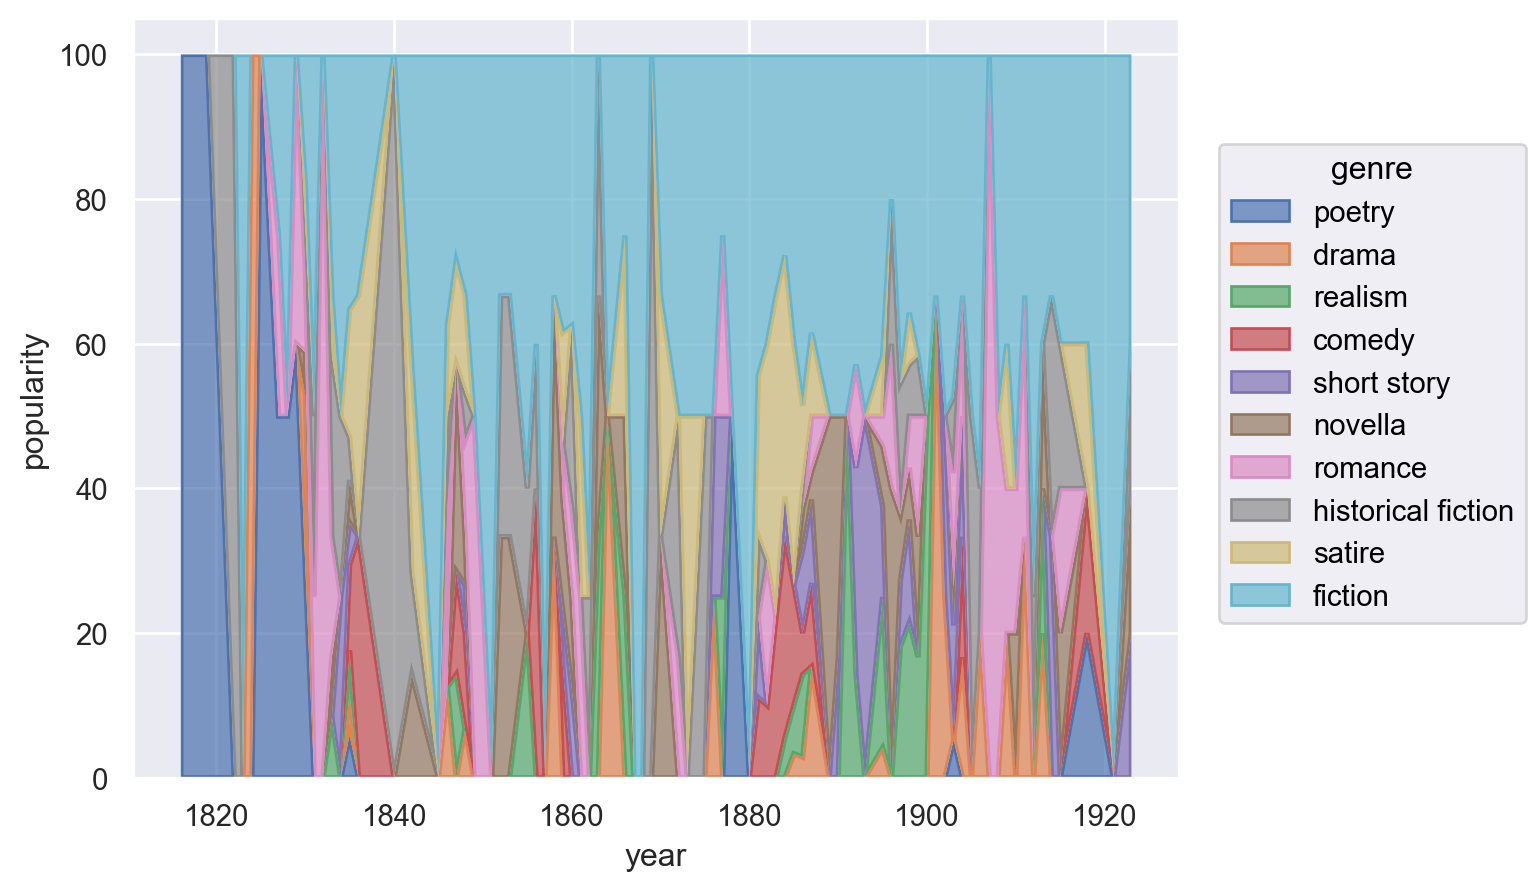

In [15]:
so.Plot(
    melted_percentage_filtered_genre_trends, "year", "popularity", color="genre"
).add(so.Area(alpha=0.7), so.Stack())

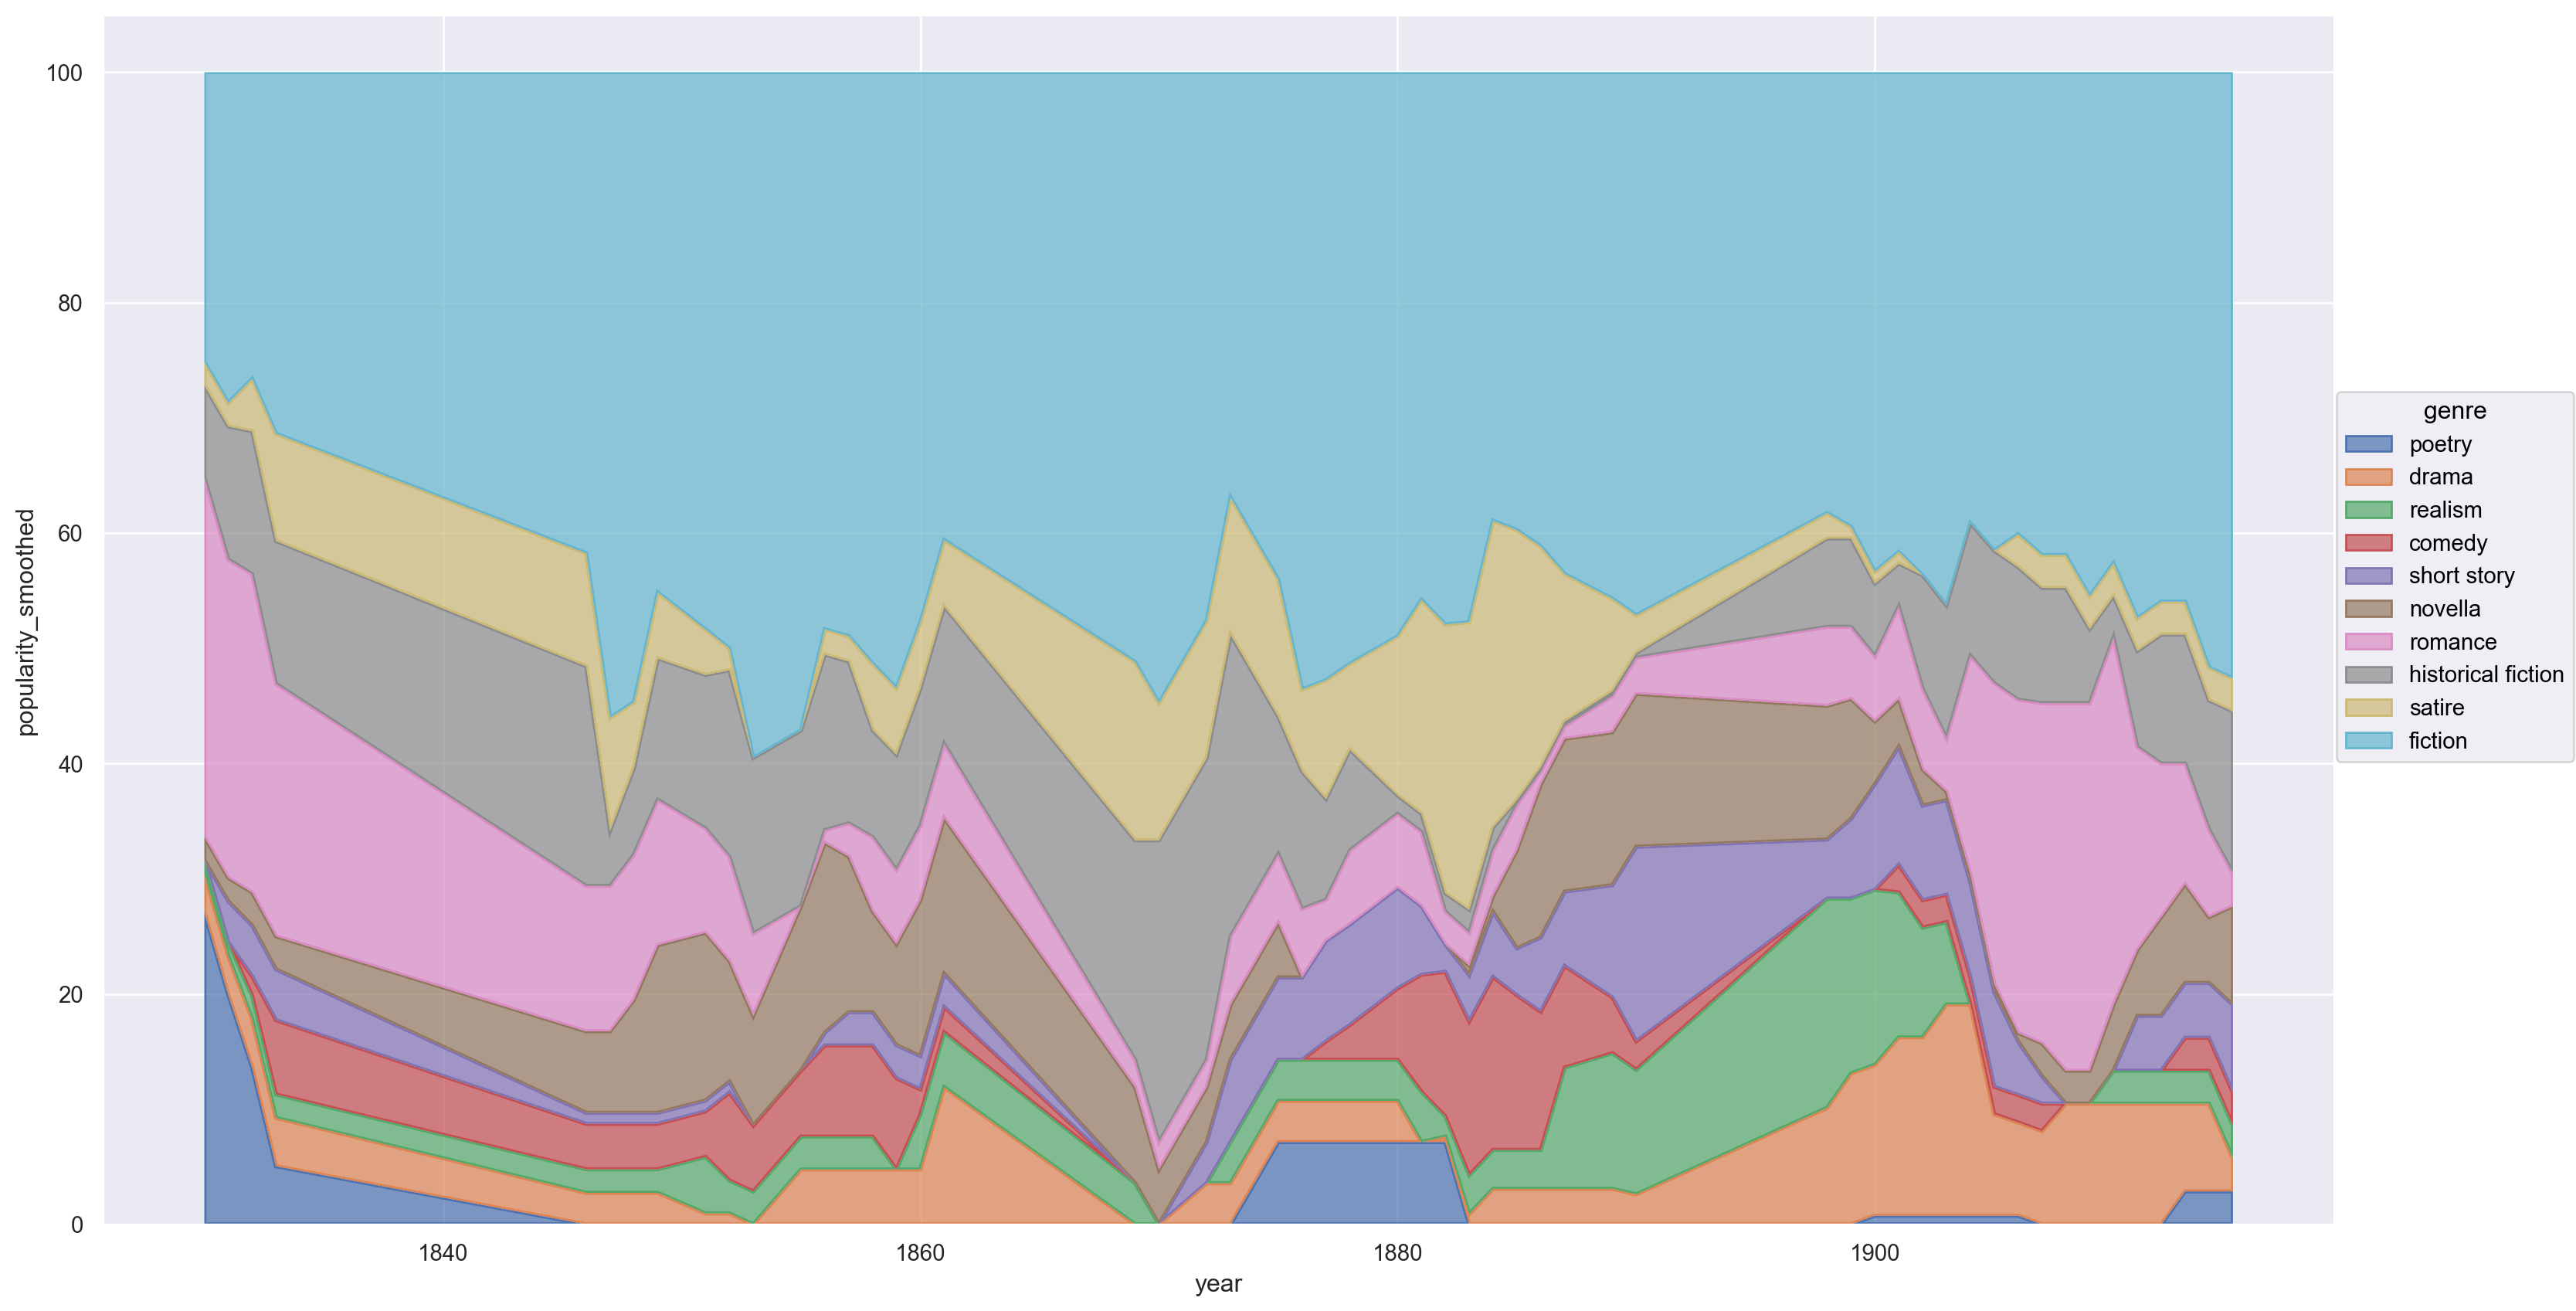

In [16]:
window_size = 7

melted_percentage_filtered_genre_trends["popularity_smoothed"] = (
    melted_percentage_filtered_genre_trends.groupby("genre")["popularity"].transform(
        lambda x: x.rolling(window=window_size, center=True).mean()
    )
)

so.Plot(
    melted_percentage_filtered_genre_trends,
    "year",
    "popularity_smoothed",
    color="genre",
).add(so.Area(alpha=0.7), so.Stack()).layout(size=(16, 9)).save(
    "test.png", bbox_inches="tight"
)

In [ ]:
# gemini_pro_long.generate_content(
#     "\"The play portrays the visit of an elderly professor and his glamorous, much younger second wife, Yelena, to the rural estate that supports their urban lifestyle. Two friends—Vanya, brother of the professor's late first wife, who has long managed the estate, and Astrov, the local doctor—both fall under Yelena's spell while bemoaning the ennui of their provincial existence. Sonya, the professor's daughter by his first wife, who has worked with Vanya to keep the estate going, suffers from her unrequited feelings for Astrov. Matters are brought to a crisis when the professor announces his intention to sell the estate, Vanya and Sonya's home, with a view to investing the proceeds to achieve a higher income for himself and his wife.\"\nRepeat each sentance with a catigorization after: horror short story humor social commentary satire fiction historical tragedy romance drama"
# ).candidates[0].content.parts[0].text

In [ ]:
# gemini_pro_long.generate_content(
#     "\"The play portrays the visit of an elderly professor and his glamorous, much younger second wife, Yelena, to the rural estate that supports their urban lifestyle. Two friends—Vanya, brother of the professor's late first wife, who has long managed the estate, and Astrov, the local doctor—both fall under Yelena's spell while bemoaning the ennui of their provincial existence. Sonya, the professor's daughter by his first wife, who has worked with Vanya to keep the estate going, suffers from her unrequited feelings for Astrov. Matters are brought to a crisis when the professor announces his intention to sell the estate, Vanya and Sonya's home, with a view to investing the proceeds to achieve a higher income for himself and his wife.\"\nRewrite the abstract like Uncle Vanya was a political commentary satire of Russia in 1870:"
# ).candidates[0].content.parts[0].text